In [24]:
import pandas as pd

In [25]:
katy_data = pd.read_csv("Youtube02-KatyPerry.csv")
psy_data = pd.read_csv("Youtube01-Psy.csv")
eminem_data = pd.read_csv("Eminem.csv")
LMFAO_data = pd.read_csv("Youtube03-LMFAO.csv")
shakira_data = pd.read_csv("Youtube05-Shakira.csv")

In [26]:
katy_data["ARTIST"] = "Katy"
eminem_data["ARTIST"] = "Eminem"
LMFAO_data["ARTIST"] = "LMFAO"
shakira_data["ARTIST"] = "Shakira"
psy_data["ARTIST"] = "Psy"
katy_data["CONTENT_LEN"] = katy_data.CONTENT.apply(len)
eminem_data["CONTENT_LEN"] = eminem_data.CONTENT.apply(len)
LMFAO_data["CONTENT_LEN"] = LMFAO_data.CONTENT.apply(len)
shakira_data["CONTENT_LEN"] = shakira_data.CONTENT.apply(len)
psy_data["CONTENT_LEN"] = psy_data.CONTENT.apply(len)

In [27]:
katy_av = katy_data.groupby(["CLASS"])["CONTENT_LEN"].mean()
eminem_av = eminem_data.groupby(["CLASS"])["CONTENT_LEN"].mean()
LMFAO_av = LMFAO_data.groupby(["CLASS"])["CONTENT_LEN"].mean()
shakira_av = shakira_data.groupby(["CLASS"])["CONTENT_LEN"].mean()
psy_av = psy_data.groupby(["CLASS"])["CONTENT_LEN"].mean()

In [28]:
two_artists_data = katy_data.append(eminem_data)
three_artists_data = two_artists_data.append(psy_data)
four_artist_data = three_artists_data.append(shakira_data)
all_artists_data = four_artist_data.append(LMFAO_data)

In [29]:
mapping = {1: "SPAM", 0: "VALID"}

In [34]:
all_artists_data

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,ARTIST,CONTENT_LEN
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,SPAM,Katy,126
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,SPAM,Katy,159
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,SPAM,Katy,340
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,SPAM,Katy,52
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,SPAM,Katy,80
...,...,...,...,...,...,...,...
433,z13lvr4iupatjlrem231yvpxolzvspwdl,Salty Croc,2014-07-22T04:20:37.489000,Like this comment for no reason﻿,SPAM,LMFAO,32
434,z12lxhrqdkyusbkji04cihtrvn3jvxnqszg0k,Bob Orton,2014-07-22T00:26:50.820000,love this song﻿,VALID,LMFAO,15
435,z12xhdjrsxm3v550w22oynsjrnmvjhkvj,LuckyMusiqLive,2014-07-21T22:25:54.048000,this song is awesome. these guys are the best....,SPAM,LMFAO,216
436,z13msngo3qvwx1ym223pehqgouexzdmnm,xXxPWND 420xXx,2014-07-21T11:05:51.945000,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,SPAM,LMFAO,48


In [33]:
all_artists_data["CLASS"] = all_artists_data["CLASS"].apply(lambda x: mapping[x])

<AxesSubplot:>

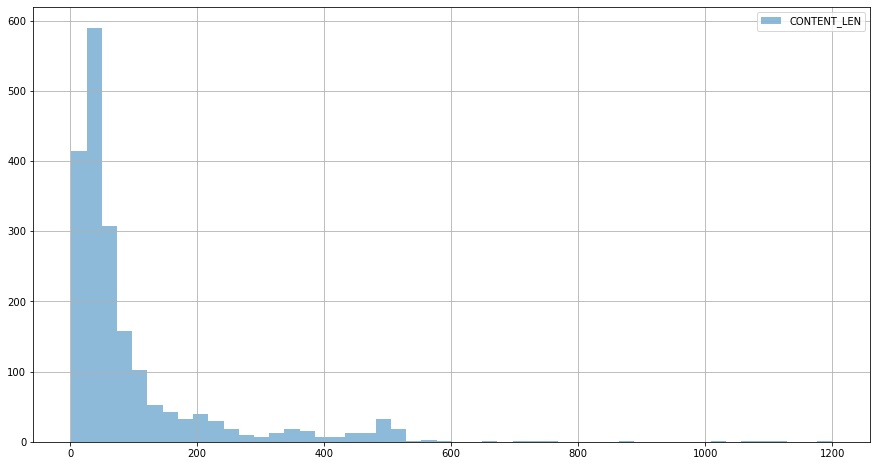

In [35]:
all_artists_data["CONTENT_LEN"].hist(figsize = (15,8), bins = 50, legend = True, alpha = 0.5)

CLASS
SPAM     AxesSubplot(0.125,0.125;0.775x0.755)
VALID    AxesSubplot(0.125,0.125;0.775x0.755)
Name: CONTENT_LEN, dtype: object

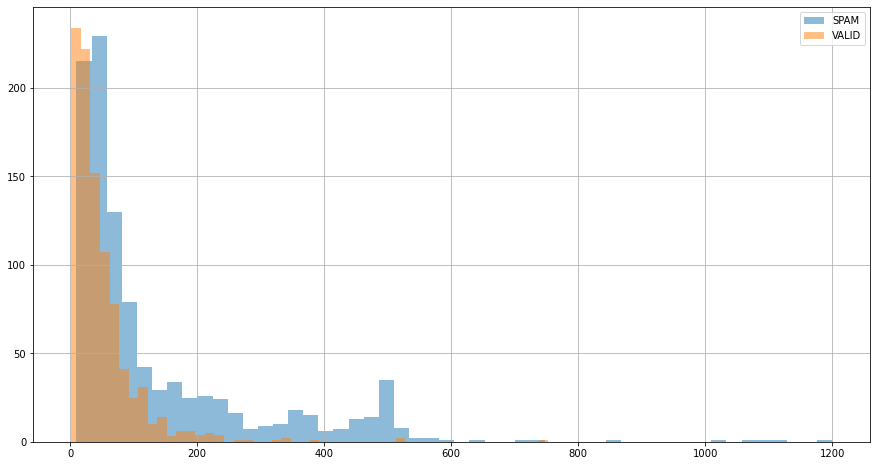

In [37]:
all_artists_data.groupby("CLASS")["CONTENT_LEN"].hist(figsize = (15,8), legend = True, alpha = 0.5, bins = 50)

In [42]:
averages = all_artists_data.groupby(["ARTIST", "CLASS"])["CONTENT_LEN"].mean() 

In [43]:
averages

ARTIST   CLASS
Eminem   SPAM     170.906122
         VALID     41.561576
Katy     SPAM     142.160000
         VALID     72.577143
LMFAO    SPAM      79.618644
         VALID     38.836634
Psy      SPAM     104.685714
         VALID     69.085714
Shakira  SPAM     196.339080
         VALID     31.321429
Name: CONTENT_LEN, dtype: float64

In [50]:
katy_av

CLASS
0     72.577143
1    142.160000
Name: CONTENT_LEN, dtype: float64

In [63]:
averages_dict = {"Katy": katy_av, "Eminem": eminem_av, "LMFAO": LMFAO_av, 
                "Shakira": shakira_av, "Psy": psy_av}

at = pd.DataFrame(averages_dict)
at.index = ["VALID", "SPAM"]


In [64]:
at

,Katy,Eminem,LMFAO,Shakira,Psy
VALID,72.577143,41.561576,38.836634,31.321429,69.085714
SPAM,142.160000,170.906122,79.618644,196.339080,104.685714


ARTIST
Eminem     AxesSubplot(0.125,0.125;0.775x0.755)
Katy       AxesSubplot(0.125,0.125;0.775x0.755)
LMFAO      AxesSubplot(0.125,0.125;0.775x0.755)
Psy        AxesSubplot(0.125,0.125;0.775x0.755)
Shakira    AxesSubplot(0.125,0.125;0.775x0.755)
Name: CONTENT_LEN, dtype: object

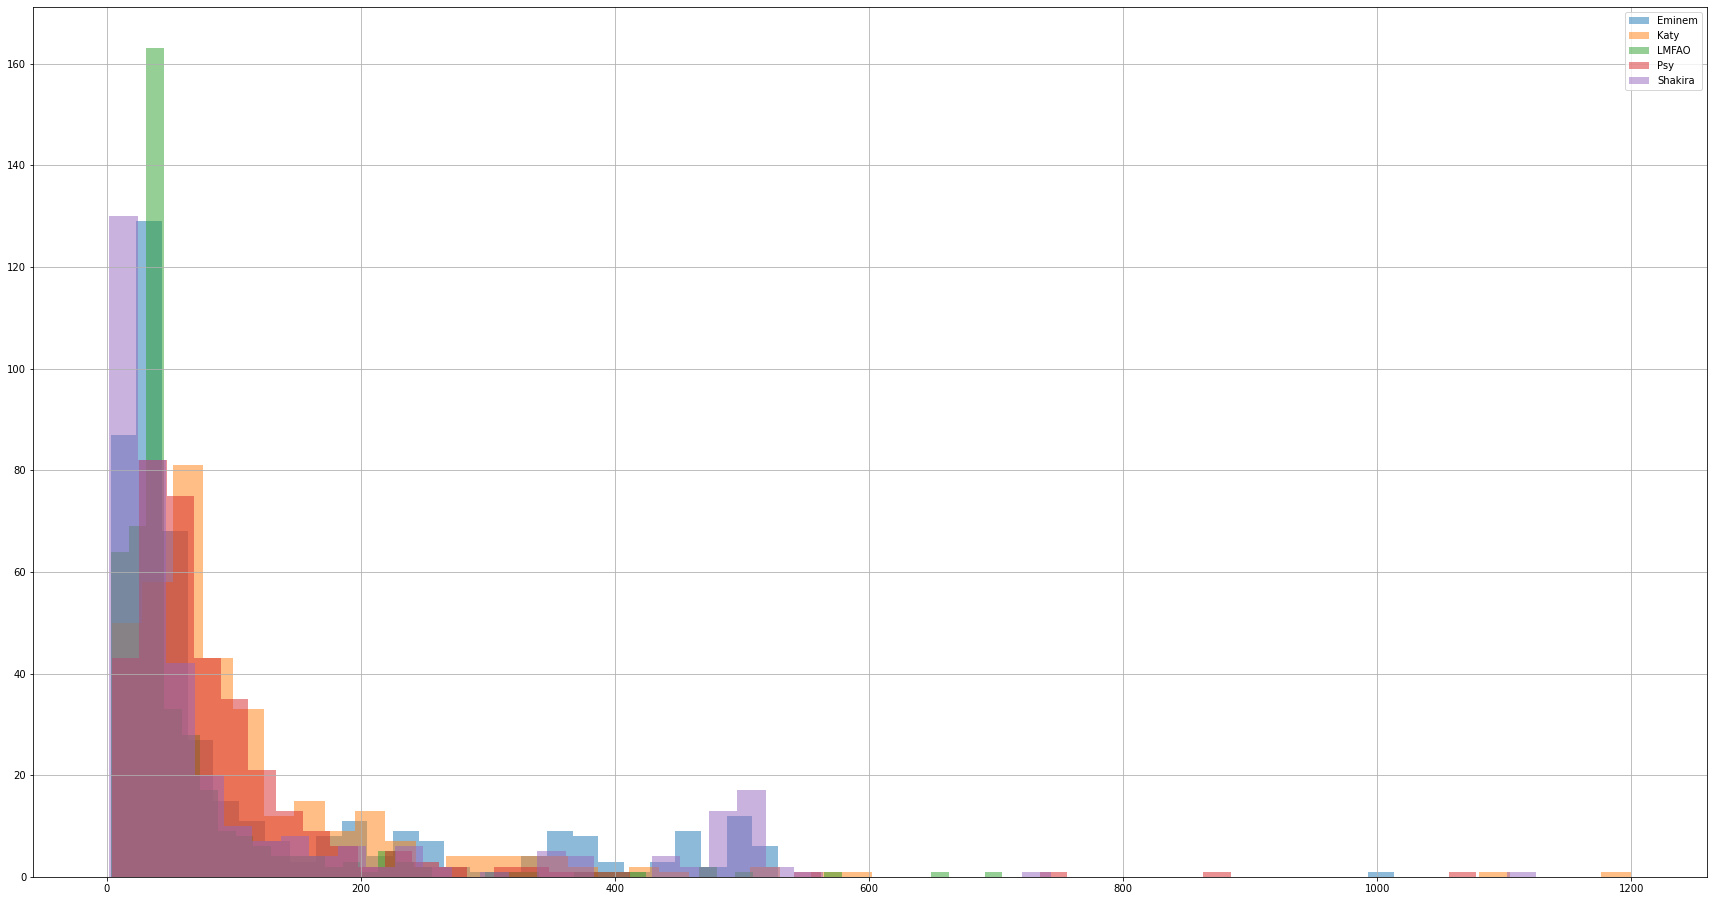

In [69]:
comments_len_grouped_by_artist = all_artists_data.groupby("ARTIST")["CONTENT_LEN"]
comments_len_grouped_by_artist.hist(figsize = (30,16), legend = True, alpha = 0.5, bins = 50)

ARTIST
Eminem     AxesSubplot(0.125,0.125;0.775x0.755)
Katy       AxesSubplot(0.125,0.125;0.775x0.755)
LMFAO      AxesSubplot(0.125,0.125;0.775x0.755)
Psy        AxesSubplot(0.125,0.125;0.775x0.755)
Shakira    AxesSubplot(0.125,0.125;0.775x0.755)
Name: CONTENT_LEN, dtype: object

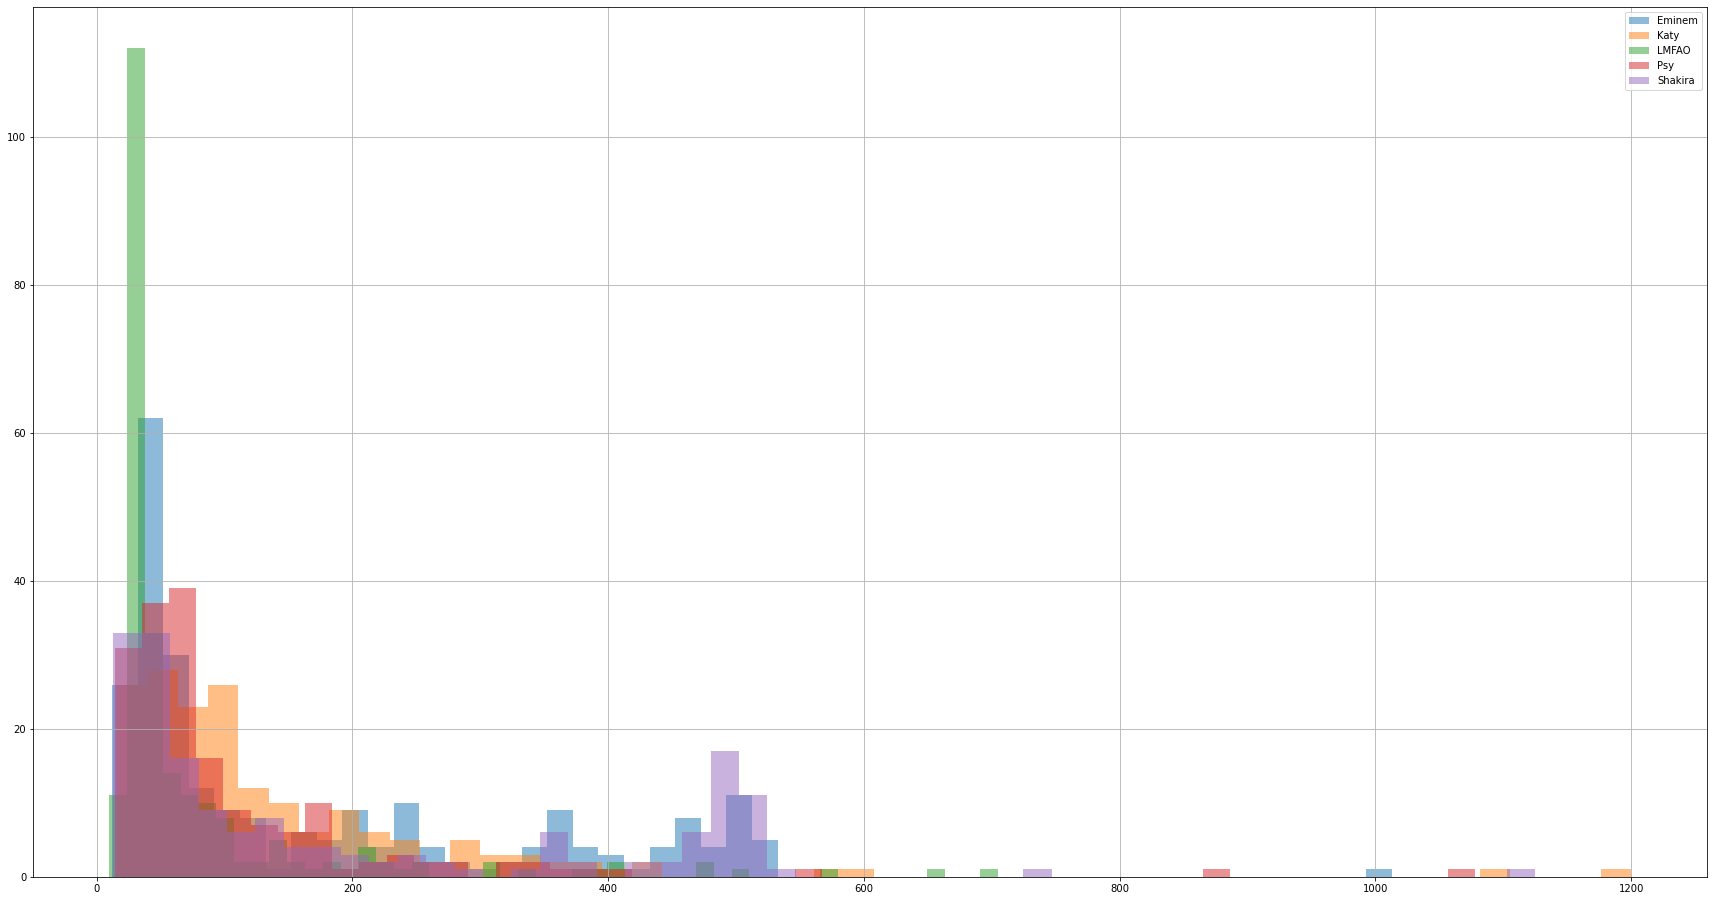

In [70]:
spam_grouped_by_artist = all_artists_data[all_artists_data["CLASS"] == "SPAM"].groupby("ARTIST")["CONTENT_LEN"]
spam_grouped_by_artist.hist(figsize = (30,16), legend = True, alpha = 0.5, bins = 50)

ARTIST
Eminem     AxesSubplot(0.125,0.125;0.775x0.755)
Katy       AxesSubplot(0.125,0.125;0.775x0.755)
LMFAO      AxesSubplot(0.125,0.125;0.775x0.755)
Psy        AxesSubplot(0.125,0.125;0.775x0.755)
Shakira    AxesSubplot(0.125,0.125;0.775x0.755)
Name: CONTENT_LEN, dtype: object

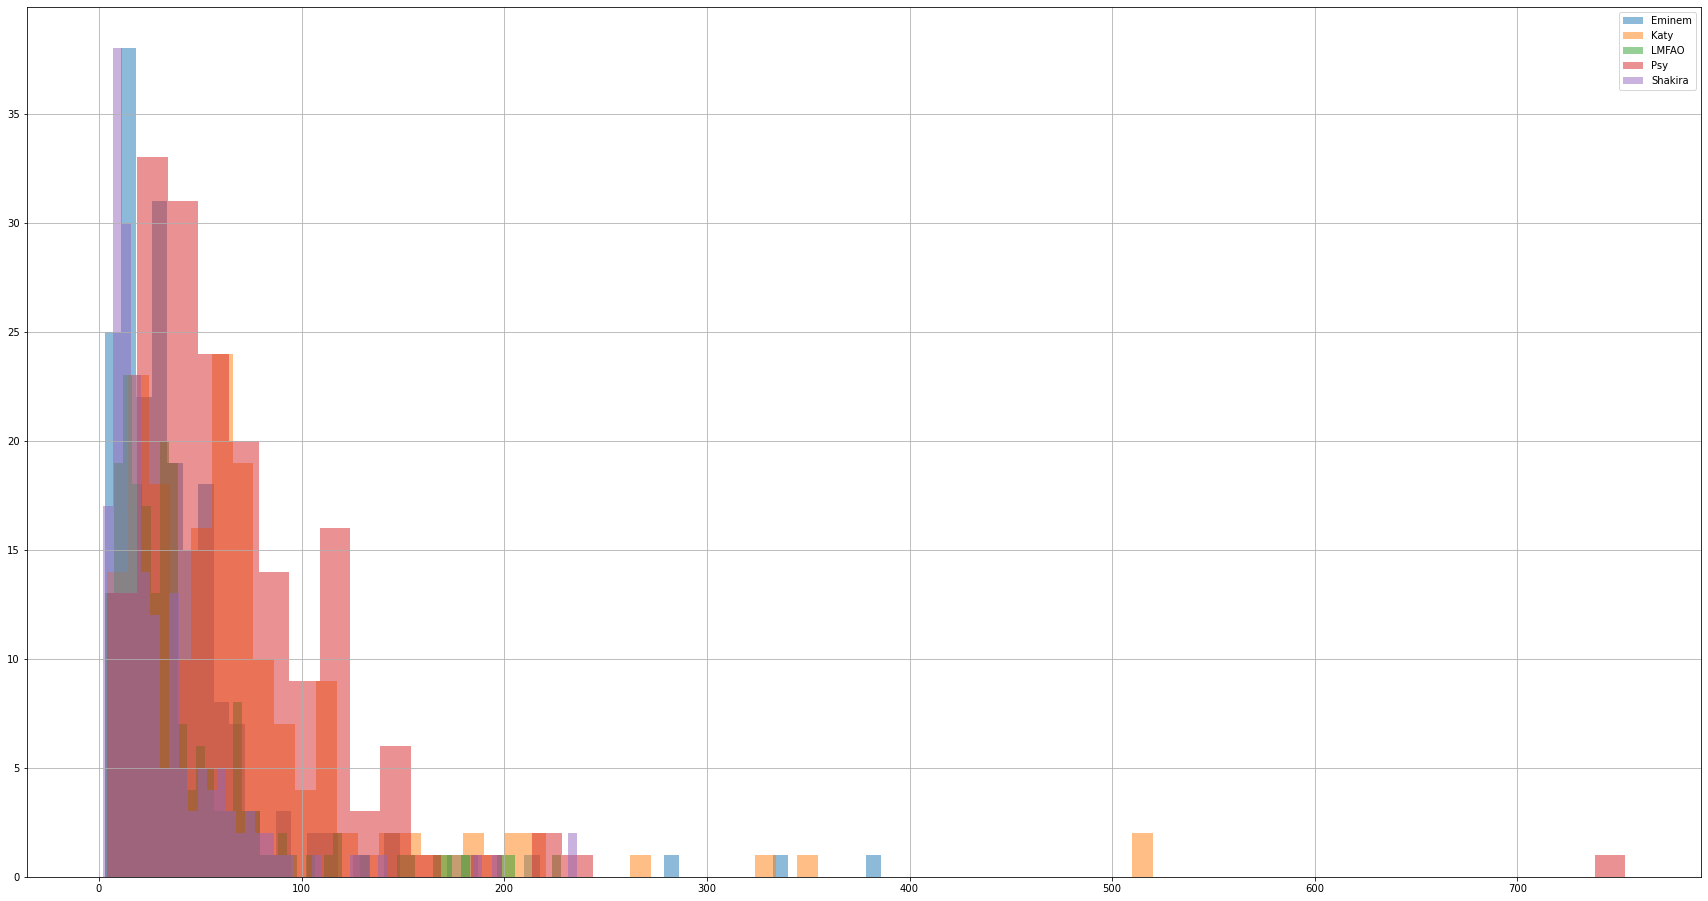

In [71]:
valid_grouped_by_artist = all_artists_data[all_artists_data["CLASS"] == "VALID"].groupby("ARTIST")["CONTENT_LEN"]
valid_grouped_by_artist.hist(figsize = (30,16), legend = True, alpha = 0.5, bins = 50)

In [72]:
all_artists_data

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,ARTIST,CONTENT_LEN
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,SPAM,Katy,126
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,SPAM,Katy,159
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,SPAM,Katy,340
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,SPAM,Katy,52
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,SPAM,Katy,80
...,...,...,...,...,...,...,...
433,z13lvr4iupatjlrem231yvpxolzvspwdl,Salty Croc,2014-07-22T04:20:37.489000,Like this comment for no reason﻿,SPAM,LMFAO,32
434,z12lxhrqdkyusbkji04cihtrvn3jvxnqszg0k,Bob Orton,2014-07-22T00:26:50.820000,love this song﻿,VALID,LMFAO,15
435,z12xhdjrsxm3v550w22oynsjrnmvjhkvj,LuckyMusiqLive,2014-07-21T22:25:54.048000,this song is awesome. these guys are the best....,SPAM,LMFAO,216
436,z13msngo3qvwx1ym223pehqgouexzdmnm,xXxPWND 420xXx,2014-07-21T11:05:51.945000,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,SPAM,LMFAO,48


In [73]:
longer_than_500 = all_artists_data[all_artists_data["CONTENT_LEN"] > 500]

In [82]:
longer_than_500.sort_values(["CONTENT_LEN", "ARTIST"])

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,ARTIST,CONTENT_LEN
105,LneaDw26bFsatnacZXb_S1v2dOV0EyaNuykTxwkPmWg,101Tele,NaN,yo I know nobody will probably even read this....,SPAM,Eminem,502
185,LneaDw26bFtEfMdXUYebOl-nweqjHYVYlY80z53Y4DY,Nick Amodei,NaN,"This past Christmas my dad passed away, to hel...",SPAM,Eminem,503
208,LneaDw26bFsILb1-yJtTNbl7IIOeXIvJxxyU3o-EtR4,Yuliya Meow,NaN,"HEY GUYS!!! ❤❤❤❤❤❤❤ BEFORE YOU IGNORE ME, PLE...",SPAM,Eminem,504
319,LneaDw26bFvgKZJfckgl7OJXXu6v0YtHfhlRTURbhdY,Ractive,NaN,hey guys if you guys can please SUBSCRIBE to m...,SPAM,Eminem,504
341,_2viQ_Qnc6_YN7xFNAg14zX99Y614Salf57yOcrBRSw,Shadrach Grentz,2013-07-21T12:21:37.898000,Hey Music Fans I really appreciate all of you ...,SPAM,Shakira,504
358,_2viQ_Qnc6-jk58CPwBnqfbM6oByJH5oPvCtKecLQyo,Shadrach Grentz,2013-07-14T03:11:20.243000,Hey Music Fans I really appreciate all of you ...,SPAM,Shakira,504
328,_2viQ_Qnc69zyetF6GsHRzYGyXl4u5kg0Sm-nP-pupI,Shadrach Grentz,2013-08-02T03:15:46.914000,Hey Music Fans I really appreciate any of you ...,SPAM,Shakira,505
250,_2viQ_Qnc68dceJbTRNTP2sksMxa_lm35LaCu_jPluY,Shadrach Grentz,2013-09-29T13:59:42.162000,Hey Music Fans I really appreciate any of you ...,SPAM,Shakira,506
329,_2viQ_Qnc699u36gNm3NRoq1quIaJWRNrftGEEZM3J4,Shadrach Grentz,2013-08-01T21:43:52.122000,Hey Music Fans I really appreciate any of you ...,SPAM,Shakira,506
330,_2viQ_Qnc68LqKGb40V2ImKQYcp1ZqpHrCCMFqMCcA4,Shadrach Grentz,2013-08-01T20:39:15.325000,Hey Music Fans I really appreciate any of you ...,SPAM,Shakira,506


In [79]:
all_artists_data.fillna(0, inplace=True)

In [83]:
all_artists_data.loc[185]

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,ARTIST,CONTENT_LEN
185,z13yele45yacxp1ux22muvvg2virwhwxh04,Magic Man,2014-10-06T19:57:32,DOWNLOAD RAPID FACEBOOK FOR FREE NOW https://p...,SPAM,Katy,113
185,LneaDw26bFtEfMdXUYebOl-nweqjHYVYlY80z53Y4DY,Nick Amodei,0,"This past Christmas my dad passed away, to hel...",SPAM,Eminem,503
185,z122dfb5htjxgpbot04cdj1aikatybbjsb0,Kitts Hausman,2014-11-07T04:48:01,It's so funny it's awesomeness lol aaaaaaa sex...,VALID,Psy,54
185,_2viQ_Qnc6_KD8seCZD8AcEirg_4NEFXuEO1fKw3lmY,VideoPro,2013-10-20T20:52:44.901000,SUBSCRIBE ME AND I REQUITE,SPAM,Shakira,26
185,z131i5aanxneixud422egfx4rsmugbpm1,NoName,2015-05-17T01:07:13.243000,"870,000,000 views...566,000 comments...oh my l...",VALID,LMFAO,51


In [85]:
all_artists_data.reset_index(inplace=True, drop=True)

In [86]:
all_artists_data

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,ARTIST,CONTENT_LEN
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,SPAM,Katy,126
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,SPAM,Katy,159
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,SPAM,Katy,340
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,SPAM,Katy,52
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,SPAM,Katy,80
...,...,...,...,...,...,...,...
1951,z13lvr4iupatjlrem231yvpxolzvspwdl,Salty Croc,2014-07-22T04:20:37.489000,Like this comment for no reason﻿,SPAM,LMFAO,32
1952,z12lxhrqdkyusbkji04cihtrvn3jvxnqszg0k,Bob Orton,2014-07-22T00:26:50.820000,love this song﻿,VALID,LMFAO,15
1953,z12xhdjrsxm3v550w22oynsjrnmvjhkvj,LuckyMusiqLive,2014-07-21T22:25:54.048000,this song is awesome. these guys are the best....,SPAM,LMFAO,216
1954,z13msngo3qvwx1ym223pehqgouexzdmnm,xXxPWND 420xXx,2014-07-21T11:05:51.945000,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,SPAM,LMFAO,48


In [87]:
all_artists_data.to_csv("all_artists_data.csv")